                           Timestamp            GHI            DNI  \
count                         521789  521789.000000  521789.000000   
mean   2022-02-07 09:15:02.087165952     236.378748     167.055791   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 03:39:00      -2.000000      -0.500000   
50%              2022-02-06 18:09:00       0.700000      -0.100000   
75%              2022-05-10 00:27:00     470.000000     316.600000   
max              2022-08-09 00:00:00    1233.000000     952.300000   
std                              NaN     328.496230     262.371237   

                 DHI           ModA           ModB           Tamb  \
count  521789.000000  521789.000000  521789.000000  521789.000000   
mean      111.638180     232.636102     225.194661      28.137363   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.100000   
50%         0.500000    

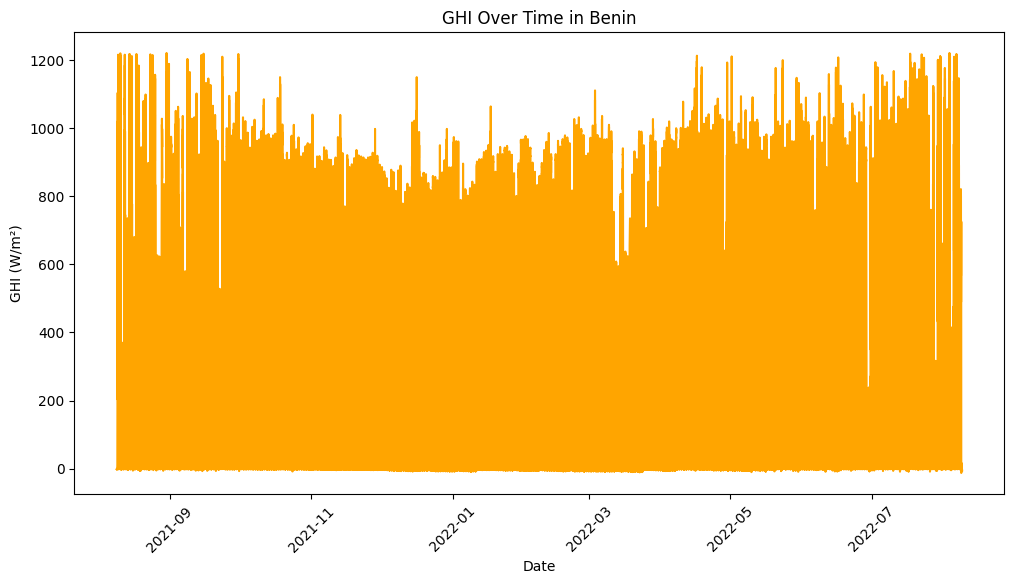

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# loading benin datasets
benin_df = pd.read_csv('../data/benin_clean.csv')

# Convert the 'Timestamp' column to datetime
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'], errors='coerce')

# Summary Statistics & Missing-Value Report
print(benin_df.describe())
print(benin_df.isna().sum())

# detecting outlier
z_scores = stats.zscore(benin_df[['GHI', 'DNI', 'DHI']])
benin_df_cleaned = benin_df[(abs(z_scores) < 3).all(axis=1)].copy()

# handling mising values
benin_df_cleaned.fillna(benin_df_cleaned.median(numeric_only=True), inplace=True)

# time series anaylsis
plt.figure(figsize=(12, 6))
plt.plot(benin_df_cleaned['Timestamp'], benin_df_cleaned['GHI'], color='orange')
plt.title('GHI Over Time in Benin')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.show()

In [3]:
benin_df_cleaned.to_csv('../data/benin_clean.csv', index=False)